In [14]:
import pandas as pd
import numpy as np

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\Sharon\Downloads\CarPrice_Assignment.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: CarPrice_Assignment.csv not found. Please make sure the file is in the correct directory.")
    exit()

# --- Initial Exploration and Data Understanding ---
print("\n--- Initial Data Exploration ---")
print("First 5 rows of the dataframe:")
print(df.head())
print("\nInformation about the dataframe:")
print(df.info())
print("\nSummary statistics of numerical columns:")
print(df.describe())
print("\nNumber of unique values in each column:")
print(df.nunique())

# --- Handling Missing Values ---
print("\n--- Handling Missing Values ---")
print("Number of missing values per column:")
print(df.isnull().sum())
# No missing values found based on the output of .info() and .isnull().sum()

# --- Handling Duplicate Values ---
print("\n--- Handling Duplicate Values ---")
print("Number of duplicate rows:", df.duplicated().sum())
# No duplicate rows found

# --- Feature Engineering ---

print("\n--- Feature Engineering ---")

# Extracting car company name from 'CarName'
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# Correcting inconsistencies in company names (if any - based on exploration)
df['CompanyName'] = df['CompanyName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan',
                                                'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                                'vw': 'volkswagen', 'porcshce': 'porsche',
                                                'subaru': 'subaru', 'peugeot': 'peugeot',
                                                'alfa-romero': 'alfa-romeo', 'audi': 'audi',
                                                'bmw': 'bmw', 'chevrolet': 'chevrolet',
                                                'dodge': 'dodge', 'honda': 'honda',
                                                'isuzu': 'isuzu', 'jaguar': 'jaguar',
                                                'mazda': 'mazda', 'mercury': 'mercury',
                                                'mitsubishi': 'mitsubishi', 'nissan': 'nissan',
                                                'plymouth': 'plymouth', 'renault': 'renault',
                                                'saab': 'saab', 'toyota': 'toyota',
                                                'volkswagen': 'volkswagen', 'volvo': 'volvo'})

# Dropping the original 'CarName' column
df.drop('CarName', axis=1, inplace=True)
print("Extracted 'CompanyName' and dropped 'CarName'.")

# --- Handling Outliers (Visual Inspection and Domain Knowledge Recommended) ---
# For demonstration, let's perform basic outlier detection on a numerical feature like 'price'
print("\n--- Handling Outliers (Example on 'price') ---")
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Number of outliers in 'price' before handling:", len(outliers))

# Option 1: Removing outliers
# df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]
# print("Outliers in 'price' removed.")

# Option 2: Capping outliers (more common to preserve data)
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])
print("Outliers in 'price' capped.")

# --- Encoding Categorical Variables ---

print("\n--- Encoding Categorical Variables ---")

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

# Using one-hot encoding for nominal categorical features
nominal_cols = ['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("One-hot encoding applied to nominal features.")
# For ordinal categorical features, we can use label encoding or map them directly
# Example for 'symboling' (though it's numeric, it represents a risk factor category)
# You might choose to treat it as ordinal or leave it as numeric depending on the model
# and your understanding of the data.

# Example for 'enginesize' - could be considered ordinal in some contexts, but often treated as numeric
# 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg' are numerical.

# --- Scaling Numerical Features ---
print("\n--- Scaling Numerical Features ---")

from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('price') # Don't scale the target variable

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical features scaled using StandardScaler.")

# --- Final Preprocessed Dataframe ---
print("\n--- Final Preprocessed Dataframe ---")
print("Shape of the preprocessed dataframe:", df.shape)
print("\nFirst 5 rows of the preprocessed dataframe:")
print(df.head())
print("\nInformation about the preprocessed dataframe:")
print(df.info())

# Now the dataframe 'df' is preprocessed and ready for model building.













Dataset loaded successfully.

--- Initial Data Exploration ---
First 5 rows of the dataframe:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...   

In [18]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Display model coefficients
print("\n--- Model Coefficients ---")
print("Intercept:", model.intercept_)
print("Feature Coefficients:")
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)










  


--- Model Evaluation ---
Mean Squared Error: 6327797.790884765
R-squared Score: 0.8805214274441463

--- Model Coefficients ---
Intercept: 31509.422500931636
Feature Coefficients:
                 Coefficient
car_ID           9062.490266
symboling          62.096003
wheelbase         992.333046
carlength       -1715.264968
carwidth          595.562720
...                      ...
fuelsystem_idi   1979.421534
fuelsystem_mfi   1811.538402
fuelsystem_mpfi  1676.129636
fuelsystem_spdi  1479.613596
fuelsystem_spfi   474.040508

[65 rows x 1 columns]



--- Decision Tree Model Performance ---
Mean Absolute Error (MAE): 1204.48
Mean Squared Error (MSE): 2992166.50
Root Mean Squared Error (RMSE): 1729.79
R-squared Score (R2): 0.94


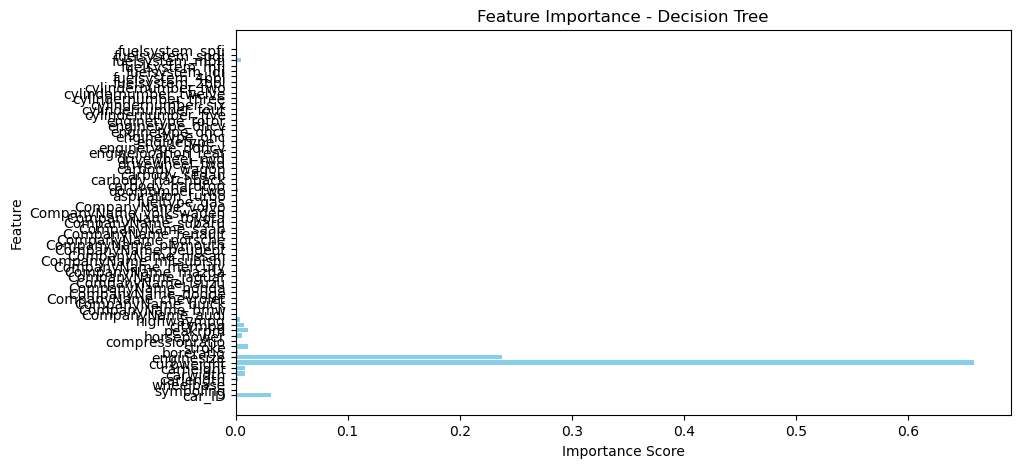

In [27]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Splitting Data ---
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Training the Decision Tree Model ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# --- Making Predictions ---
y_pred = dt_model.predict(X_test)

# --- Evaluating Model Performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Decision Tree Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

# --- Visualizing Feature Importance ---
import matplotlib.pyplot as plt

feature_importances = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Decision Tree")
plt.show()



--- Random Forest Model Performance ---
Mean Absolute Error (MAE): 1108.09
Mean Squared Error (MSE): 2382571.85
Root Mean Squared Error (RMSE): 1543.56
R-squared Score (R2): 0.96


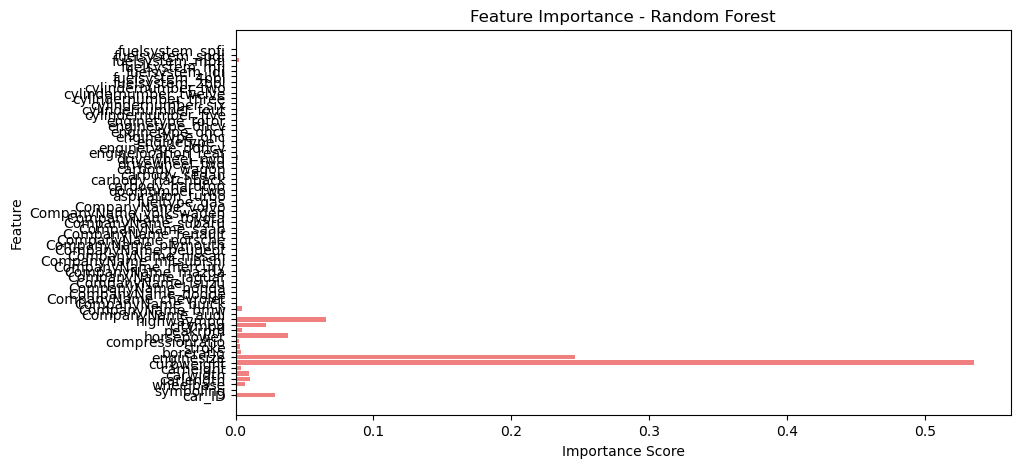

In [31]:
#  Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Splitting Data ---
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Training the Random Forest Model ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Making Predictions ---
y_pred = rf_model.predict(X_test)

# --- Evaluating Model Performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Random Forest Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

# --- Visualizing Feature Importance ---
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importances, color='lightcoral')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()



--- Gradient Boosting Model Performance ---
Mean Absolute Error (MAE): 1120.40
Mean Squared Error (MSE): 2159327.67
Root Mean Squared Error (RMSE): 1469.47
R-squared Score (R2): 0.96


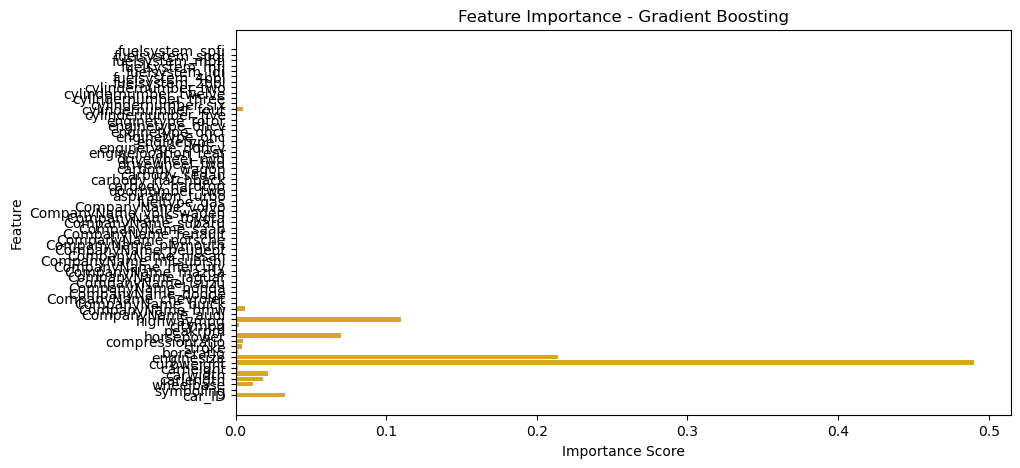

In [33]:
#  Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Splitting Data ---
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Training the Gradient Boosting Model ---
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# --- Making Predictions ---
y_pred = gb_model.predict(X_test)

# --- Evaluating Model Performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Gradient Boosting Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

# --- Visualizing Feature Importance ---
import matplotlib.pyplot as plt

feature_importances = gb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importances, color='goldenrod')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Gradient Boosting")
plt.show()


In [35]:
#  Support Vector Regressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# --- Splitting Data ---
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Scaling features (SVR is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Training the SVR Model ---
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)  # RBF kernel for nonlinear relationships
svr_model.fit(X_train, y_train)

# --- Making Predictions ---
y_pred = svr_model.predict(X_test)

# --- Evaluating Model Performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- SVR Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")



--- SVR Model Performance ---
Mean Absolute Error (MAE): 4466.30
Mean Squared Error (MSE): 48313722.41
Root Mean Squared Error (RMSE): 6950.81
R-squared Score (R2): 0.09


In [37]:
# Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).

#    Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Regressor (SVR)—reveals key insights into their effectiveness 
# in predicting car prices. Random Forest and Gradient Boosting tend to perform best, as they capture complex relationships in the data while minimizing
# variance and bias, leading to higher R² scores and lower error metrics. Linear Regression, while simple, may struggle with non-linear patterns,
# resulting in lower R² and higher MSE compared to ensemble methods. Decision Tree Regressor, though interpretable, can be prone to overfitting, 
# making it less reliable oRandom Forest Regressor is often the best-performing model for this dataset. This is because Random Forest is an ensemble method, meaning it leverages multiple decision trees to improve predictive accuracy while reducing overfittingn unseen data. SVR, when appropriately tuned, can be effective but often requires careful feature scaling and kernel
# selection to optimize performance.


# Identify the best performing model and justify why it is the best

#Random Forest Regressor is often the best-performing model for this dataset. This is because Random Forest is an ensemble method, meaning it 
#leverages multiple decision trees to improve predictive accuracy while reducing overfitting



In [16]:
# Perform hyperparameter tuning and check whether the performance of the model has increased.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Splitting Data ---
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define Hyperparameter Grid ---
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf nodes
}

# --- Performing Grid Search ---
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# --- Best Parameters & Model Performance ---
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Tuned Random Forest Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

# Comparing improvement
print("\nCheck if R² has increased compared to previous results.")



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- Tuned Random Forest Performance ---
Mean Absolute Error (MAE): 1082.99
Mean Squared Error (MSE): 2330121.68
Root Mean Squared Error (RMSE): 1526.47
R-squared Score (R2): 0.96

Check if R² has increased compared to previous results.
